# Basic preparations

In this Notebook, the geofabric for the Assiniboine River Basin, Canada, is extracted from the `MERIT-Basins` dataset.

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import hydrant.topology.geom as gm

import subprocess
import os
import glob

Path definitions (system dependant - modify accordingly):

In [2]:
# geofabric paths
## merit-basins
mb_path = '/project/rpp-kshook/Model_Output/MERIT-Basins/MERIT_Hydro_v07_Basins_v01_bugfix1/pfaf_level_02/'
nc_path = '/project/rpp-kshook/Model_Output/MERIT-Basins/MERIT_Hydro_v07_Basins_v01_bugfix1/coastal_hillslopes'
## basin boundaries
bs_path = './boundaries/basin_*.shp'

# output paths
mb_out = '/home/kasra545/scratch/arb_models/geofabric_result/'

# Reading Geofabric Dataset

## ARB boundaries

In [3]:
arb = pd.concat([gpd.read_file(f).to_crs(epsg=4326) for f in glob.glob(bs_path)])

<AxesSubplot:>

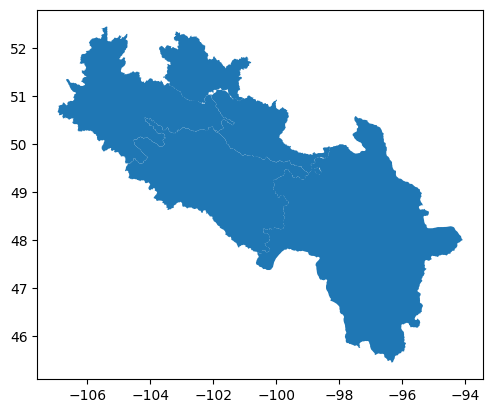

In [4]:
arb.plot()

## MERIT-Basins layers

Upon **visual** inspection, layer #71 has sub-basins and river branches inside the boundary of the Assiniboine River Basin!

In [5]:
# file names
cat_files = ['cat_pfaf_71_MERIT_Hydro_v07_Basins_v01_bugfix1.shp']
riv_files = ['riv_pfaf_71_MERIT_Hydro_v07_Basins_v01_bugfix1.shp']
nca_files = ['hillslope_71_clean.shp']

# reading in data
cat = pd.concat([gpd.read_file(os.path.join(mb_path, f)) for f in cat_files])
riv = pd.concat([gpd.read_file(os.path.join(mb_path, f)) for f in riv_files])
nca = pd.concat([gpd.read_file(os.path.join(nc_path, f)) for f in nca_files])

In [6]:
cat.set_crs(epsg=4326, inplace=True)
nca.set_crs(epsg=4326, inplace=True)
riv.set_crs(epsg=4326, inplace=True)

,COMID,lengthkm,lengthdir,sinuosity,slope,uparea,order,strmDrop_t,slope_taud,NextDownID,maxup,up1,up2,up3,up4,geometry
0,71000001,7.020492,4.158236,1.688334,0.000570,391.901537,2,0.0,0.000000,71000065,2,71000095,71000213,0,0,"LINESTRING (-98.06167 60.00000, -98.06250 59.9..."
1,71000002,24.171249,15.709184,1.538670,0.000058,701.754912,2,1.4,0.000058,71000065,2,71000003,71000014,0,0,"LINESTRING (-98.06167 60.00000, -98.06083 60.0..."
2,71000003,14.760464,11.209022,1.316838,0.000770,480.760660,2,11.4,0.000770,71000002,2,71000004,71000011,0,0,"LINESTRING (-98.17250 60.13000, -98.17333 60.1..."
3,71000004,6.240078,4.631999,1.347168,0.000911,388.938962,2,5.7,0.000911,71000003,2,71000005,71000015,0,0,"LINESTRING (-98.33500 60.07000, -98.33583 60.0..."
4,71000005,4.462477,3.338111,1.336827,0.000670,328.557527,2,3.0,0.000670,71000004,2,71000006,71000012,0,0,"LINESTRING (-98.39917 60.09667, -98.40000 60.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48946,71048947,1.498642,1.192443,1.256782,0.000333,32.277067,1,0.5,0.000333,71048442,0,0,0,0,0,"LINESTRING (-96.79000 45.95583, -96.79083 45.9..."
48947,71048948,2.743329,1.941526,1.412975,0.001674,52.472792,1,4.6,0.001674,71048857,0,0,0,0,0,"LINESTRING (-96.90500 45.95500, -96.90583 45.9..."
48948,71048949,9.357690,5.642147,1.658534,0.000171,76.116685,1,1.6,0.000171,71048338,0,0,0,0,0,"LINESTRING (-97.72083 45.99500, -97.72000 45.9..."
48949,71048950,12.016268,9.919203,1.211415,0.001511,43.278839,1,18.2,0.001511,71048880,0,0,0,0,0,"LINESTRING (-96.25667 45.96417, -96.25583 45.9..."


# Preparing `cat`, `riv`, and `nca` objects for ARB

## Preparing `catchments` and `rivers` from `MERIT-Basins`

In [7]:
catchments = gm.prepare_cat(cat=cat, cat_col_id='COMID', cst=nca, cst_col_mapper={'FID':'COMID'}, cst_col_id='COMID')

In [8]:
catchments

,COMID,unitarea,geometry,hillslope
0,71000001,39.620826,"POLYGON ((-98.14542 60.06375, -98.13792 60.063...",0
1,71000002,99.276774,"MULTIPOLYGON (((-98.11958 60.19292, -98.11458 ...",0
2,71000003,63.957629,"MULTIPOLYGON (((-98.33375 60.03542, -98.33292 ...",0
3,71000004,16.746171,"MULTIPOLYGON (((-98.40125 60.05208, -98.40042 ...",0
4,71000005,5.993164,"POLYGON ((-98.43208 60.10708, -98.43125 60.107...",0
...,...,...,...,...
50682,71050683,0.060656,"POLYGON ((-94.80792 59.88292, -94.80458 59.882...",1
50683,71050684,0.008723,"POLYGON ((-94.80875 59.65792, -94.80708 59.657...",1
50684,71050685,0.004362,"POLYGON ((-94.81042 59.65792, -94.80958 59.657...",1
50685,71050686,10.810153,"POLYGON ((-108.54708 52.72625, -108.54625 52.7...",1


In [9]:
rivers = gm.prepare_riv(riv=riv, riv_cols={'id':'COMID', 'next_id':'NextDownID', 'slope':'slope', 'length':'lengthkm', 'length_direct':'lengthdir'}, cat=catchments, cat_cols={'id':'COMID', 'hillslope':'hillslope', 'geom':'geometry'})

In [10]:
rivers

,COMID,lengthkm,lengthdir,sinuosity,slope,uparea,order,strmDrop_t,slope_taud,NextDownID,maxup,up1,up2,up3,up4,geometry,hillslope
0,71000001,7.020492,4.158236,1.688334,0.000570,391.901537,2,0.0,0.000000,71000065,2,71000095,71000213,0,0,"LINESTRING (-98.06167 60.00000, -98.06250 59.9...",0
1,71000002,24.171249,15.709184,1.538670,0.000058,701.754912,2,1.4,0.000058,71000065,2,71000003,71000014,0,0,"LINESTRING (-98.06167 60.00000, -98.06083 60.0...",0
2,71000003,14.760464,11.209022,1.316838,0.000770,480.760660,2,11.4,0.000770,71000002,2,71000004,71000011,0,0,"LINESTRING (-98.17250 60.13000, -98.17333 60.1...",0
3,71000004,6.240078,4.631999,1.347168,0.000911,388.938962,2,5.7,0.000911,71000003,2,71000005,71000015,0,0,"LINESTRING (-98.33500 60.07000, -98.33583 60.0...",0
4,71000005,4.462477,3.338111,1.336827,0.000670,328.557527,2,3.0,0.000670,71000004,2,71000006,71000012,0,0,"LINESTRING (-98.39917 60.09667, -98.40000 60.0...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50682,71050683,1.000000,1.000000,1.000000,1.000000,1.000000,1,1.0,1.000000,-9999,1,1,1,1,1,None,1
50683,71050684,1.000000,1.000000,1.000000,1.000000,1.000000,1,1.0,1.000000,-9999,1,1,1,1,1,None,1
50684,71050685,1.000000,1.000000,1.000000,1.000000,1.000000,1,1.0,1.000000,-9999,1,1,1,1,1,None,1
50685,71050686,1.000000,1.000000,1.000000,1.000000,1.000000,1,1.0,1.000000,-9999,1,1,1,1,1,None,1


## Subsetting ARB portion

In [11]:
arb_catchments, arb_rivers = gm.intersect_topology(cat=catchments, cat_cols={'id':'COMID'}, riv=rivers, riv_cols={'id':'COMID', 'next_id':'NextDownID'}, shapefile=arb)

In [12]:
arb_catchments

,COMID,unitarea,geometry,hillslope
22062,71022063,10.649720,"POLYGON ((-105.72042 52.02375, -105.71958 52.0...",0
22300,71022301,9.125379,"MULTIPOLYGON (((-105.55625 52.02542, -105.5554...",0
22409,71022410,28.270187,"MULTIPOLYGON (((-105.55042 52.03208, -105.5479...",0
22433,71022434,59.981617,"POLYGON ((-102.86208 52.04042, -102.85875 52.0...",0
22861,71022862,5.683721,"POLYGON ((-105.63708 52.05542, -105.63042 52.0...",0
...,...,...,...,...
48946,71048947,32.277067,"POLYGON ((-96.85375 45.98375, -96.85125 45.983...",0
48947,71048948,52.472792,"MULTIPOLYGON (((-96.90625 45.95542, -96.90542 ...",0
48948,71048949,76.116685,"MULTIPOLYGON (((-97.83125 46.00875, -97.82542 ...",0
48949,71048950,43.278839,"POLYGON ((-96.07708 46.00542, -96.07625 46.005...",0


## Plotting!

<AxesSubplot:>

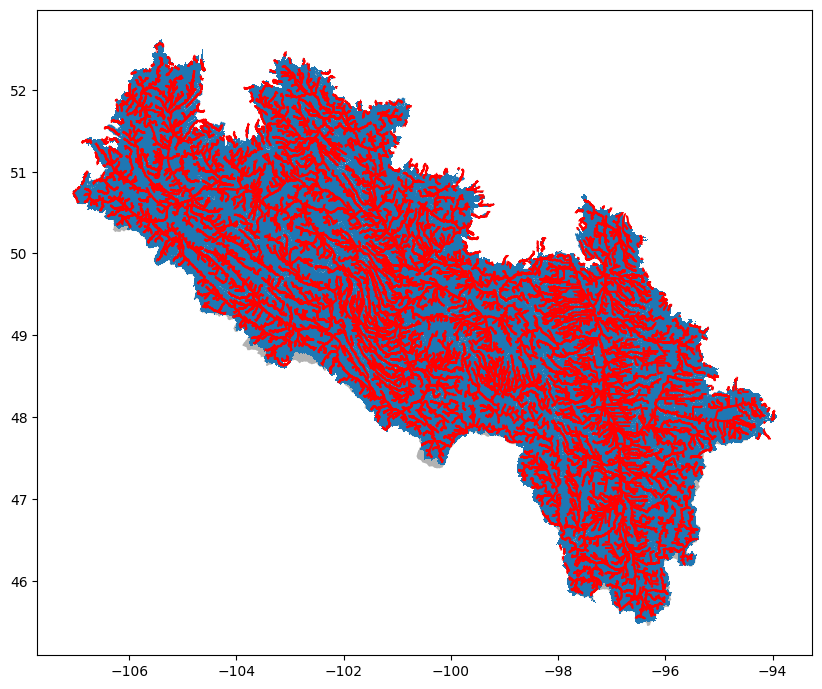

In [13]:
ax = arb.plot(color='black', alpha=0.3, figsize=(10, 20))
arb_rivers.plot(ax=ax, color='red')
arb_catchments.plot(ax=ax)

## Saving data

In [14]:
# saving data
arb_catchments.to_file(os.path.join(mb_out, 'arb_catchments.shp'))
arb_rivers.to_file(s.path.join(mb_out, 'arb_rivers.shp'))

DriverIOError: Failed to create file /home/kasra545/scratch/arb_models/geofabric_result/arb_catchments.shp: No such file or directory